# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# DFT in der Anwendung

In diesem Notebook werden wir die DFT zwar nicht selbst implementieren, uns aber deren physikalische Interpretation ansehen.

<div style="background-color:lightyellow;border:solid grey;padding:10px">

**Aufgabe 1:** Konstruiert zunächst ein fünf Sekunden langes Signal mit zwei Sinus-Tönen mit den Frequenzen 2 Hz und 5 Hz durch Additive Synthese (nicht vergessen: die einzelnen Sinustöne mit 0.5 multiplizieren, damit das Signal in der Range (-1 - 1) bleibt) mit der Sampling Rate 1000 Hz und speichert es unter der Variable `x`.

</div>

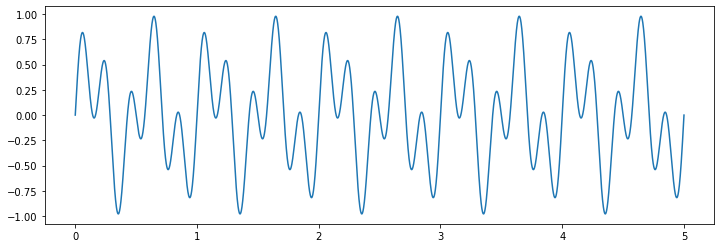

In [2]:
sr = 1000
length = 5
t = np.linspace(0,length,sr*length)

freq1, freq2 = 2,5
x = (np.sin(freq1*2*np.pi*t)+np.sin(freq2*2*np.pi*t))*0.5


plt.figure(figsize=(12, 4))
plt.plot(t, x)
plt.show()

<div style="background-color:lightyellow;border:solid grey;padding:10px">

**Aufgabe 2:** Führt mit der Funktion `np.fft.fft` (siehe [Dokumentation](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)) die DFT durch und speichert sie unter der Variable `dft`.

</div>

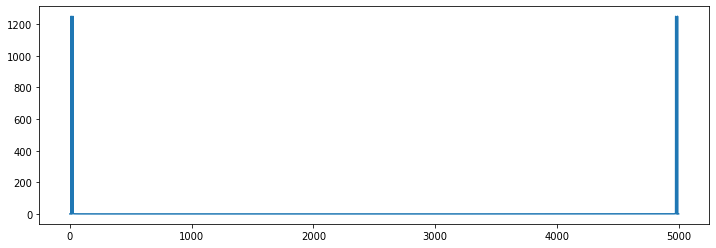

In [42]:
dft = np.fft.fft(x)
#print(np.abs(dft[400]))

plt.figure(figsize=(12, 4))
plt.plot(np.abs(dft))
plt.show()

Wir können beobachten, dass der geplottete Graph symmetrisch zu sein scheint.

Gleichzeitig sehen wir auf der x-Achse die Frequenz-Indizes ($k$) von 0 - 5000. Diese sind nicht mit der Frequenz in Hertz zu verwechseln!!

Wir möchten nun auf der x-Achse die entprechenden (physikalischen) Frequenzen plotten. Hierfür verwenden wir die Formel:

$f = \dfrac{k \cdot sr}{N}$

<div style="background-color:lightyellow;border:solid grey;padding:10px">

**Aufgabe 3:** Erstellt einen Array `f` mit den zu den jeweiligen $k$ gehörenden Frequenzen in Hertz mit der oben stehenden Formel. Limitiert die Anzeige des Plots auf die Frequenzen von 0 bis 7 Hz mit der Funktion `plt.xlim`.

</div>

5000


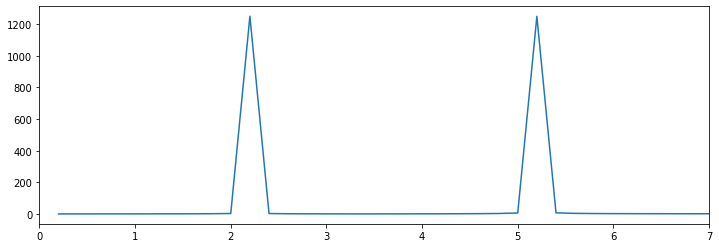

In [49]:
i = np.linspace(1,5000,5000)

f = i * sr / 5000

#print(f.size)
    
plt.figure(figsize=(12, 4))
plt.plot(f,np.abs(dft))
plt.xlim(0,7)
plt.show()

Nun möchten wir noch ein zweites (ähnliches) Signal analysieren. Anstatt zwei gleichzeitiger Töne schreiben wir stattdessen zwei aufeinanderfolgende Töne mit den Frequenzen 2 und 5 Hz in unser Signal `x`:

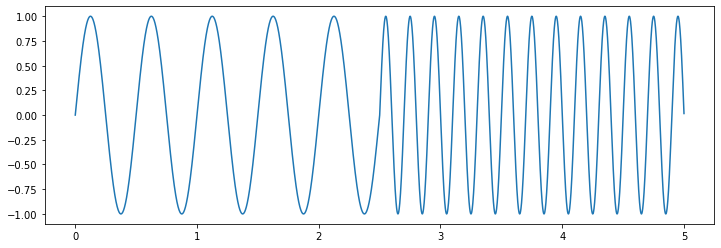

In [50]:
sr = 1000
length = 5
t = np.linspace(0, length, int(sr * length))
freq1, freq2 = 2, 5
x = np.concatenate((np.sin(t[:int(length * sr / 2)] * 2 * np.pi * freq1), 
                    np.sin(t[:int(length * sr / 2)] * 2 * np.pi * freq2)))

plt.figure(figsize=(12, 4))
plt.plot(t, x)
plt.show()

<div style="background-color:lightyellow;border:solid grey;padding:10px">

**Aufgabe 4:** Führt nun mit diesem Signal erneut die DFT durch und plottet sie zusammen mit den physikalischen Frequenzen und limitiert den Plot auf 0 bis 7 Hz (wie in den Aufgaben 1-3).

</div>

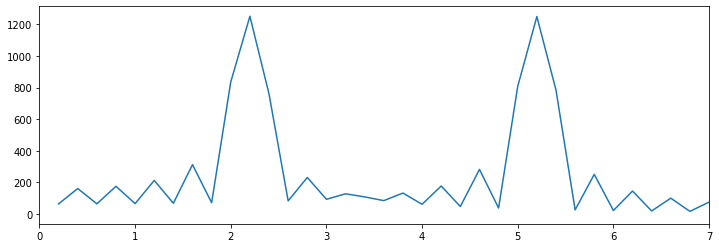

In [54]:
dft = np.fft.fft(x)
#i = np.linspace(1,5000,5000)
#f = i * sr / 5000

plt.figure(figsize=(12, 4))
plt.plot(f, np.abs(dft))
plt.xlim(0,7)
plt.show()